In [83]:
# Pacotes de preparação de dados
import pandas as pd
import numpy as np

#Pacotes Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem estatisticas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score 

# Modulo de analise Exploratoria
import aed

In [81]:
df = pd.read_csv('base_rh.csv' ,  sep=',')

In [5]:
df

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2
...,...,...,...,...,...,...,...,...
1465,Não,Viaja frequentemente,Ensino Técnico,Casado,Não,Muito bom,36,5
1466,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,39,7
1467,Não,Viaja raramente,Ensino Superior,Casado,Sim,Muito bom,27,6
1468,Não,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,49,9


In [7]:
df.isnull().sum()

Funcionario_Deixou_Empresa    0
Freq_Viagens                  0
Formacao                      0
Estado_Civil                  0
Faz_hora_extras               0
Equilibrio_de_Vida            0
Idade                         0
Tempo_de_empresa              0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467     True
1468    False
1469    False
Length: 1470, dtype: bool

In [37]:
df.duplicated().sum()

33

In [49]:
len = df.loc[df.duplicated()]

In [55]:
df.loc[df.duplicated()]

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa,Funcionario_Deixou_Empresa_encoded,Faz_hora_extras_encoded
160,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,22,2,0,0
410,Não,Viaja raramente,Ensino Superior,Solteiro,Não,Muito bom,30,5,0,0
461,Não,Viaja raramente,Ensino Superior,Solteiro,Não,Muito bom,35,5,0,0
498,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,22,2,0,0
633,Não,Viaja raramente,Ensino Superior,Casado,Não,Muito bom,36,5,0,0
698,Não,Viaja raramente,Ensino Superior,Casado,Não,Muito bom,35,5,0,0
799,Não,Viaja raramente,Ensino Técnico,Casado,Não,Muito bom,42,22,0,0
844,Não,Viaja raramente,Ensino Superior,Casado,Não,Muito bom,30,10,0,0
894,Não,Viaja raramente,Ensino Superior,Casado,Não,Muito bom,54,10,0,0
902,Não,Viaja raramente,Ensino Técnico,Divorciado,Não,Muito bom,27,5,0,0


In [53]:
len.shape

(33, 10)

In [15]:
df.loc[df.duplicated().sum()]

Funcionario_Deixou_Empresa                Sim
Freq_Viagens                  Viaja raramente
Formacao                      Ensino Superior
Estado_Civil                           Casado
Faz_hora_extras                           Não
Equilibrio_de_Vida                  Excelente
Idade                                      39
Tempo_de_empresa                            1
Name: 33, dtype: object

C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


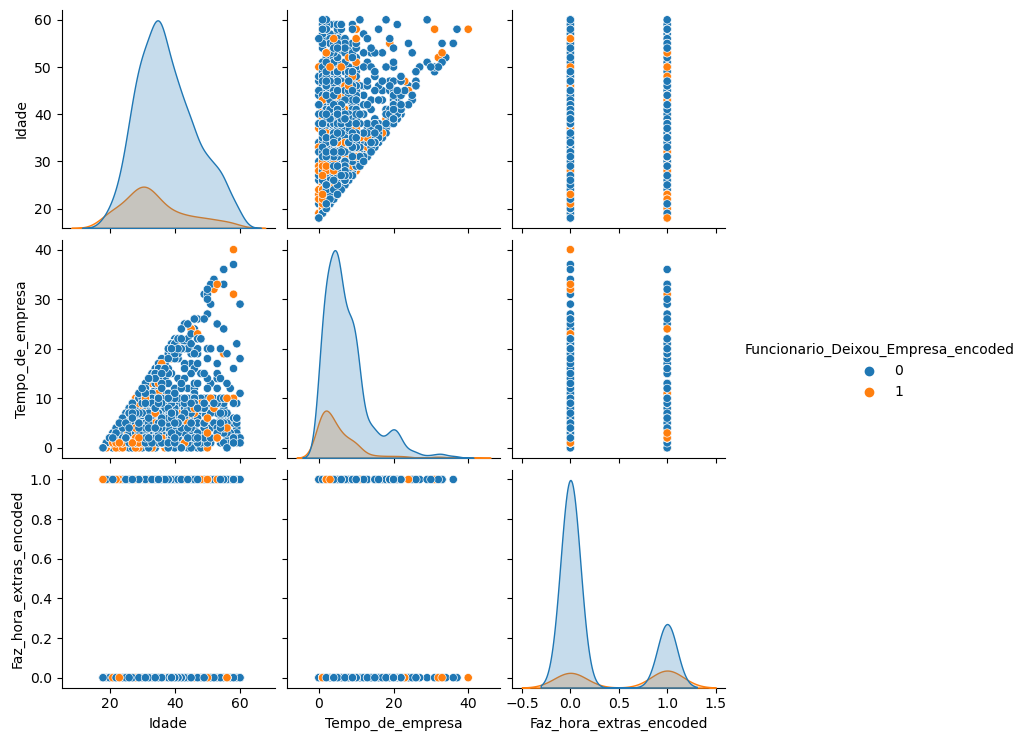

In [39]:
# # Codificar a coluna 'Funcionario_Deixou_Empresa' para 0 e 1
# df['Faz_hora_extras_encoded'] = df['Faz_hora_extras'].map({'Sim': 1, 'Não': 0})

# # Plotar o pairplot usando a coluna codificada
# sns.pairplot(df, hue='Faz_hora_extras_encoded')
# plt.show()

# Codificar a coluna 'Funcionario_Deixou_Empresa' para 0 e 1
df['Funcionario_Deixou_Empresa_encoded'] = df['Funcionario_Deixou_Empresa'].map({'Sim': 1, 'Não': 0})

# Plotar o pairplot usando a coluna codificada
sns.pairplot(df, hue='Funcionario_Deixou_Empresa_encoded')
plt.show()



In [85]:
df['Target'] = np.where(df['Funcionario_Deixou_Empresa'] == 'Sim', 1,0)

In [87]:
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa,Target
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6,1
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10,0
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0,1
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8,0
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2,0


In [90]:
df_iv = aed.analise_iv(df, 'Target')
df_iv.get_lista_iv()

C:\Users\FIC\Desktop\01 - Primeiros Passos com Python - Jardel\Arvore de Decisão\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


# Modelo Arvore de Decisão:

In [98]:
df.Freq_Viagens.unique()

array(['Viaja raramente', 'Viaja frequentemente', 'Não viaja'],
      dtype=object)

In [100]:
df_modelo = pd.get_dummies(df)

In [102]:
df_modelo

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,5,0,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1466,39,7,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
1467,27,6,0,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1468,49,9,0,True,False,False,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False


In [104]:
# target (varial resposta)
y = df_modelo['Target']
# FEatures (varial Explicativa)
x = df_modelo.drop(['Target', 'Funcionario_Deixou_Empresa_Não', 'Funcionario_Deixou_Empresa_Sim'], axis = 1)

,Idade,Tempo_de_empresa,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,Formacao_Ensino Superior,Formacao_Ensino Técnico,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True
1,49,10,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False
2,37,0,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False
3,33,8,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False
4,27,2,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,5,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False
1466,39,7,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
1467,27,6,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1468,49,9,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False


In [122]:
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

Text(0.5, 1.0, 'Estimativa de Turnover')

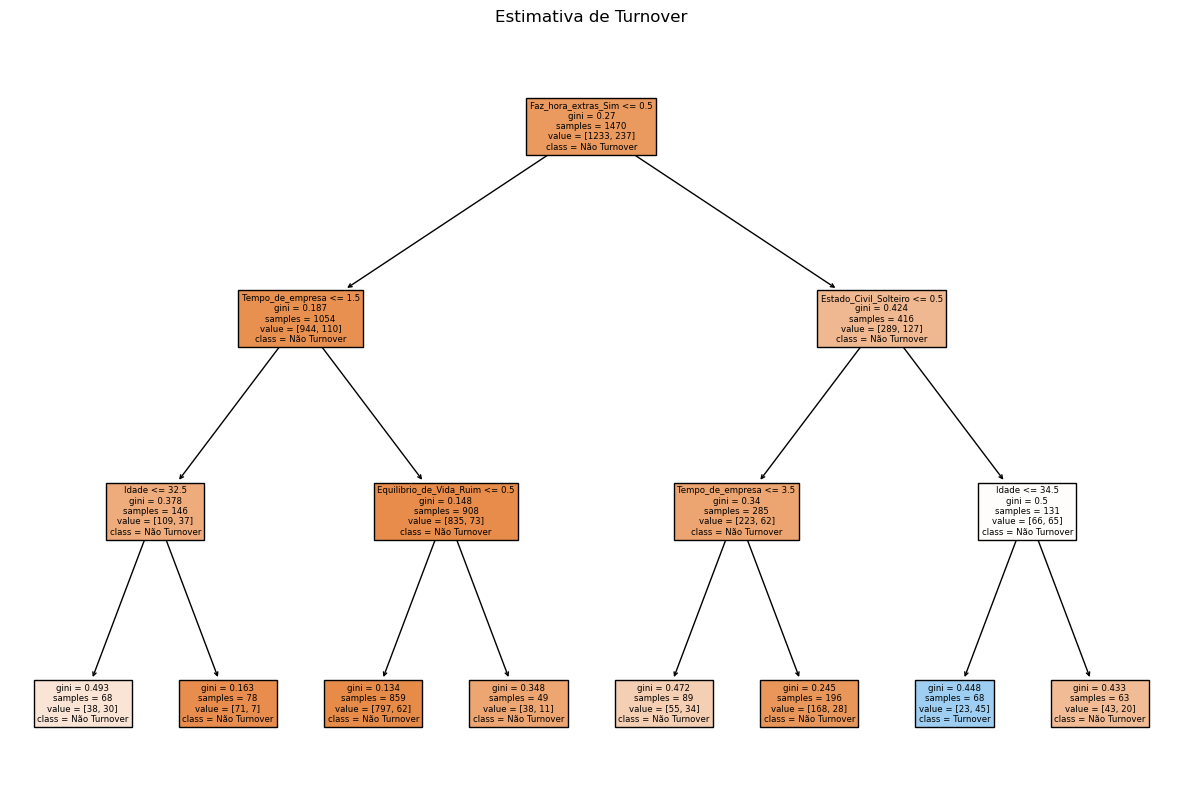

In [124]:
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo, feature_names = features,class_names = ['Não Turnover', 'Turnover'], filled = True);
plt.title("Estimativa de Turnover")